<a href="https://colab.research.google.com/github/willamesalmeida/machine_learning/blob/master/Redes_Neurais_Artificiais_Machine_learning_na_pr%C3%A1tica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O DATASET analisado trata da qualidade de vinhos e pode ser encontrado no seguinte sitio:**

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#1 Fazendo os importes da biblioteca
* Para começar nosso trabalho vamos importar algumas bibliotecas. 

* A princípio, vamos importar a lib Numpy, que nós ajudaram a trabalhar com vetores e matrizes, além disso, também facilitará alguns cálculos matemáticos, e a lib Pandas, que nós ajudará na manipulação do nosso dataset. 

* Assim que necessárias outras blibliotecas, elas seram importadas aqui, mas suas explicações seram feita no momento que forem necessárias.

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.model_selection import train_test_split
  from sklearn.tree import plot_tree
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import f1_score
  from sklearn.metrics  import roc_auc_score
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics  import roc_curve
  from sklearn.neural_network import MLPClassifier
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV


# 2 Fazendo a leitura e o carregamento dos dados na memória
* Agora utilizando a lib pandas, vamos fazer o carregamento de nosso dataset na memória para que possamos começar nosso trabalho.

* Faremos algumas verificações em nosso dataset, primeiro vamos ver se está tudo ok em nossas colunas. Depois utilizaremos o head() para visualizar algumas linhas do nosso dataset. Por default, esse método retorna 5 linhas. 



In [ ]:
#lendo o dataset Sobre qualidade de vinhos
dados = pd.read_csv('/content/drive//My Drive/Colab Notebooks/Dataset/winequality-red.csv')

* Fazendo a visualização das colunas do nosso arquivo

In [ ]:
#verificando as colunas do arquivo
dados.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

* Fazendo a visualização das linhas utilizando o head()





In [ ]:
#visualizando algumas linhas 
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3 Tratando os dados e fazendo limpeza
* Nesta etapa faremos o tratamentos de nossos dados e para isso utilizaremos alguns métodos.

* Então, podemos remover dados NAN, remover valores null, remover dados duplicados, entre outros. 

* Também podemos utilizar algumas métricas para resolver esses tipos de problemas, quando existem valores null em uma coluna, por exemplo, podemos fazer a média de todos os valores que a coluna (atributo com valores faltantes) possui e colocar o resultado no lugar do valor null. 

* Logo abaixo verificamos a quantidade de colunas e linhas que nosso dataset possue.

In [ ]:
#verificando a quantidade de linhas e colunas
dados.shape

(1599, 12)

* Agora faremos a remoção dos valores duplicados que existem em nossos dados. 

In [ ]:
#removendo valores duplicados e visualizando se teve muita diferença utilizando shape (possuia alguns valores duplicados) 
#dados = dados.drop_duplicates()
dados.shape

(1599, 12)

* Podemos fazer também a remoção dos valores NAN, porém, nosso dataset não possuia valores NAN.

In [ ]:
#Removendo os valores NAN (não possuia NAN)
dados = dados.dropna()
dados.shape

(1599, 12)

* Aqui utilizamos o método .isnull().sum() para que possamos visualizar a quantidade somada de valores null por atributos presente em nosso dataset.

In [ ]:
#verificando a quantidade de valores nulos dentro do dataframe
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* A renomeação dos atributos é algo importante a se fazer porque, mais a frente, em nosso trabalho, precisaremos fazer referência (chamadas) a alguns desses atibutos. 

* Então, remover os espaços em branco dos atibutos de nomes compostos é importante para não nós depararmos com alguns erros inesperados.

* Sendo assim, abaixo subistituimos os espaços em branco dos nomes dos atributos por underline(_), depois utilizamos o head() para visualizar nossos dados com a nova nomeclatura.

In [ ]:
#renomeando as colunas para failcitar a analise posteriormente
dados = dados.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'residual sugar': 'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide','citric acid':'citric_acid' })
#Visualizando a tabela com a nova nomeclatura
dados.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#4 Análise preliminar dos dados
* Nesta etapa podemos fazer alguns plots de gráficos para ter algumas ideias e ter uma melhor visualização de como estão nossos dados. 

* Sabemos que a qualidados do nosso vinho esta sendo avaliadas por uma pontuação que vai de 0, para o vinhos de menor qualidade, a 10, para o vinhos de meaior qualidade. 

* Então, vamos verificar como está a distribuição dessa pontuação.

**Aqui, utilizaremos a biblioteca metaplotlib. Essa é
uma lib que auxilia na visualição e geração de gráficos. Seu import foi feito no começo desse notebook e foi apelidade de plt.**

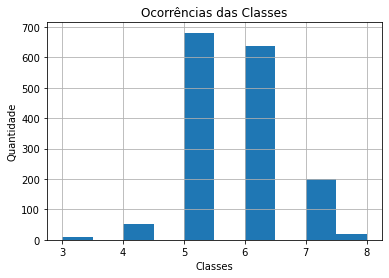

In [ ]:
#verificando as pontuações da qualidade g
plt.hist(dados['quality'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

* Pelo gráfico é possivel ver que não possuimos vinhos com as pontuações de melhor nem de pior qualidade.

* Vamos fazer alguns prints para visualizar melhor a quantidade de vinhos por cada pontuação.

In [ ]:
#Visualizando a quantidade de vinhos pelas pontuações de qualidade
print('Qualidade 1: ', dados[dados['quality']==1].shape[0])
print('Qualidade 2: ', dados[dados['quality']==2].shape[0])
print('Qualidade 3: ', dados[dados['quality']==3].shape[0])
print('Qualidade 4: ', dados[dados['quality']==4].shape[0])
print('Qualidade 5: ', dados[dados['quality']==5].shape[0])
print('Qualidade 6: ', dados[dados['quality']==6].shape[0])
print('Qualidade 7: ', dados[dados['quality']==7].shape[0])
print('Qualidade 8: ', dados[dados['quality']==8].shape[0])
print('Qualidade 9: ', dados[dados['quality']==9].shape[0])
print('Qualidade 10: ', dados[dados['quality']==10].shape[0])

Qualidade 1:  0
Qualidade 2:  0
Qualidade 3:  10
Qualidade 4:  53
Qualidade 5:  681
Qualidade 6:  638
Qualidade 7:  199
Qualidade 8:  18
Qualidade 9:  0
Qualidade 10:  0


* Podemos verificar a distribuição de alguns atributos que podem ser importantes para a classificação dos vinho.

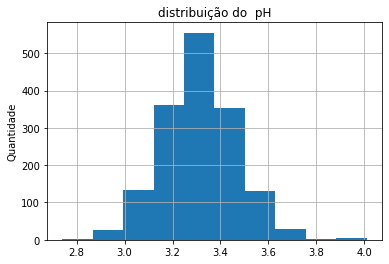

In [ ]:
#verificando a distribuição do atibuto pH 
plt.hist(dados['pH'],10)
plt.ylabel('Quantidade')
plt.title('distribuição do  pH')
plt.grid(True)
plt.show()

* O PH dos vinhos não passam de 4.0 e a maior ocorrência é de vinhos com PH entre 3.2 e 3.4. 

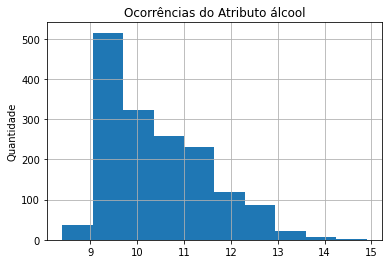

In [ ]:
#verificando a distribuição do atibuto álcool
plt.hist(dados['alcohol'], 10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo álcool')
plt.grid(True)
plt.show()

* O Teor alcoólico dos vinhos não passam de 15 sendo que a maior ocorrencia de teor alcoólico está entre 9 e 10

* Para ter uma melhor visualização podemos utilizar um gráfico de barras para ver a influência de alguns atributos na qualidade dos vinhos.

* Podemos utilizar o gráfico de barras para comparaçoes entre dois atributos, sendo isso o que faremos a seguir. 

**Utilizaremos uma biblioteca chamada seaborn para plotar nossos gráficos de barras. Essa lib é baseada na metaplotlib, utilizaremos ela por questão de facilidade  na plotagem (pelo menos para esse caso facilitou), necessitando basicamente de uma linha de código.**

**Mas também é possivel utilizar a metaplotlib para gerar o gráfico de barras**

**O importe da seaborn foi feito no começo do notebook e foi apelidada de sns.**


* Vamos plotar os atibutos para verificar quais influenciam mais na qualidado do vinho. Usaremos o gráfico de barras para fazer comparações entre o atibutos de qualidade e os demais atributos.

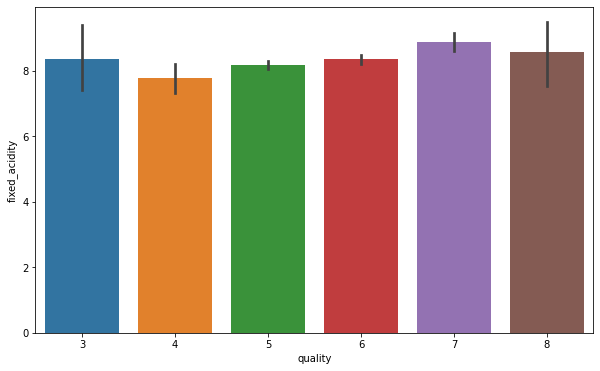

In [ ]:

#Verificando a influência de alguns atributos para a qualidade do vinho 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'fixed_acidity', data = dados)

* O ácido fixo possui uma variação por cada pontuação, então, esse atributo não possui muita relação com a qualidade dos vinhos.

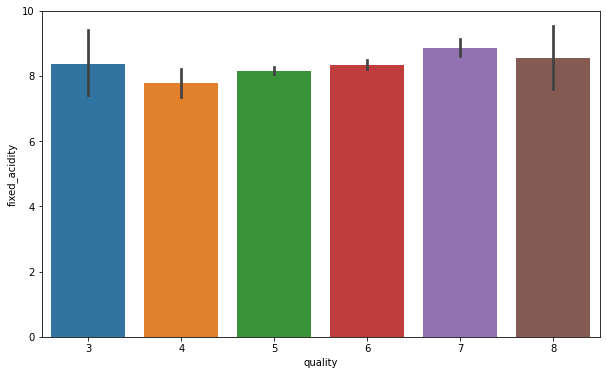

In [ ]:
#Verificando a influência de alguns atributos para a qualidade do vinho 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'fixed_acidity', data = dados)

* Nesse caso vemos que a ácidez fixa não influência muito na qualidade do vinho 

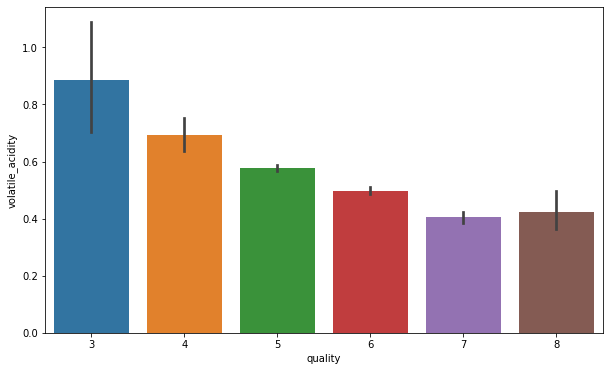

In [ ]:
#Verificando a influência da acidez volatil na qualidade do vinh, 
#vemos que há uma queda na acidez volátil conforme aumentamos a qualidade
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'volatile_acidity', data = dados)

* Vemos que com o aumento da qualidade acontece uma diminuição da acidez volátil

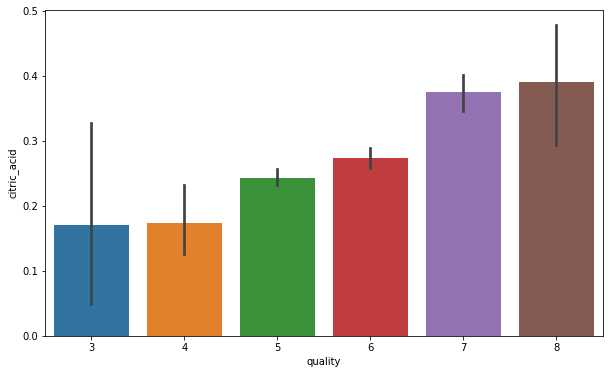

In [ ]:
#Verificando a influência do acido citrico na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'citric_acid', data = dados)

* O ácido cítrico possui um crescimento conforme a qualidade do vinho também aumenta, possivelmente possui uma grande relação com a qualidade.

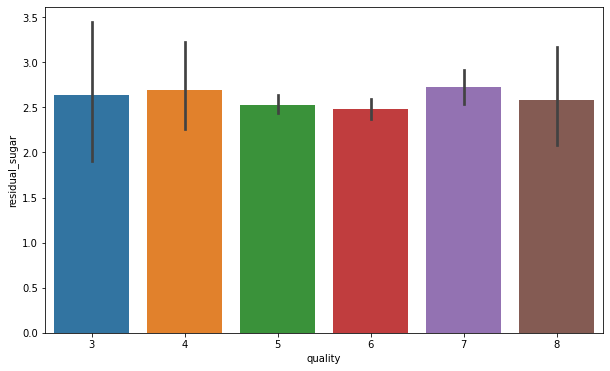

In [ ]:
#Verificando a influencia do açucar residual na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'residual_sugar', data = dados)

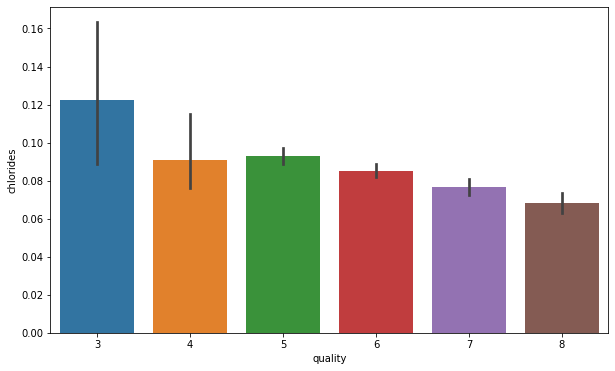

In [ ]:
#Verificando a influência do cloreto na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'chlorides', data = dados)

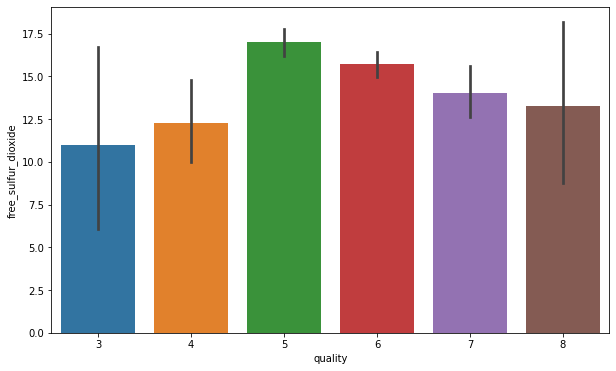

In [ ]:
#Verificando a influencia do dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'free_sulfur_dioxide', data = dados)

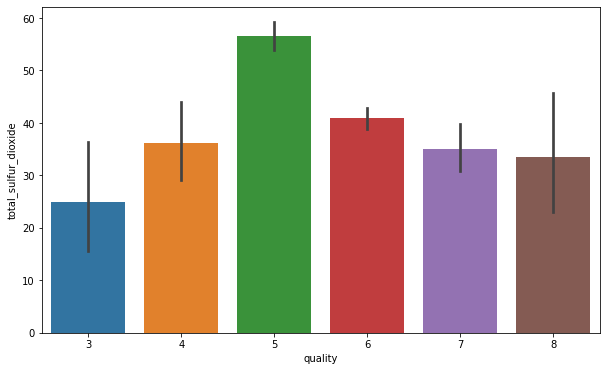

In [ ]:
#Verificando a influencia do total de dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'total_sulfur_dioxide', data = dados)

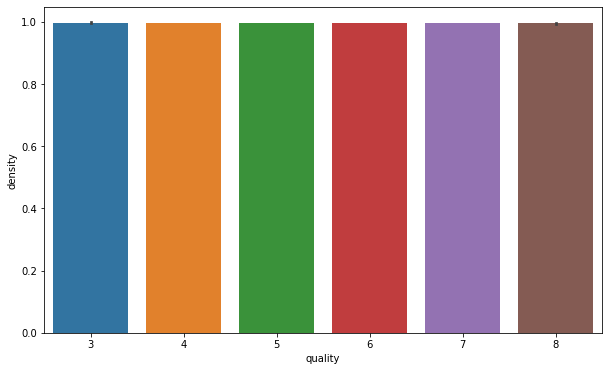

In [ ]:
#Verificando a influência do density na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'density', data = dados)

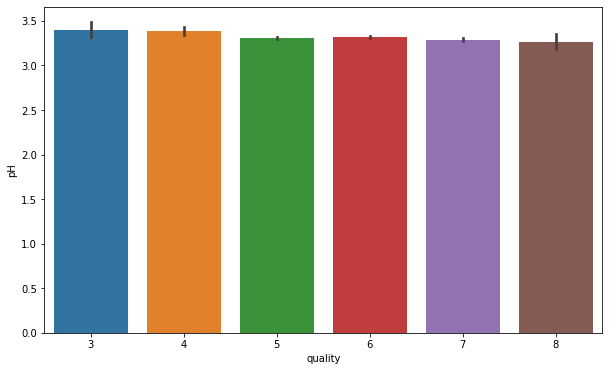

In [ ]:
#Verificando a influência do pH na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'pH', data = dados)

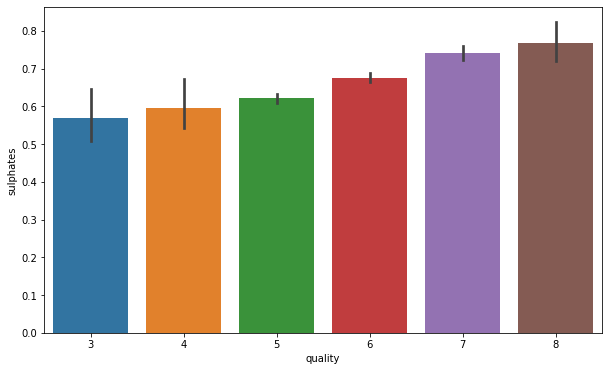

In [ ]:
#Verificando a influência do sulfato na qualidade do vinho
#vemos que há um aumento na qualidade do vinho confrome aumenta a quantidade de sulfato
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'sulphates', data = dados)

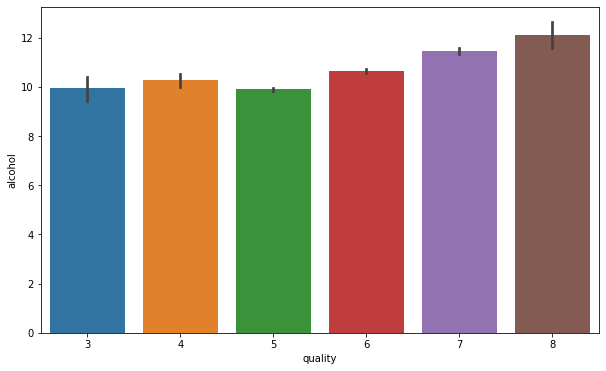

In [ ]:
#Verificando a influência do álcool na qualidade do vinho
#Com o álcool acontece algo parecido com o que aconteceu com o sulfato. Porém, se diferência pela quantidade que tem pouca variação entre as pontuações de qualidade. 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'alcohol', data = dados)

* Vemos no plot acima que o alchool influência um pouco na qualidade do vinho. Os vinhos com maior teor alcoólico estão com pontuação maior de qualidade.
* Existem três atibutos que mais influênciam na qualidade do vinho, são eles: Ácidez citrica, Sulfato e o álcool.

* Então, Vamos visualizar a probabilidade desses atributos


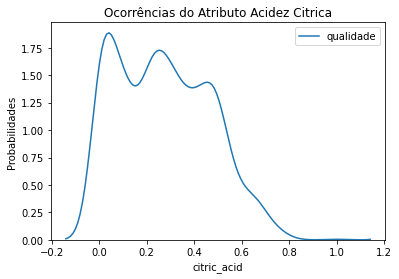

In [ ]:
# Verificando a probabilidade da ácidez citrica
sns.distplot(dados.citric_acid, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Acidez Citrica')
plt.show()

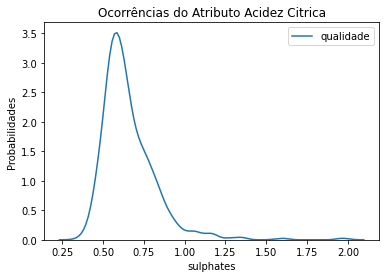

In [ ]:
#Verificando o atibuto sulfato
sns.distplot(dados.sulphates, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Acidez Citrica')
plt.show()

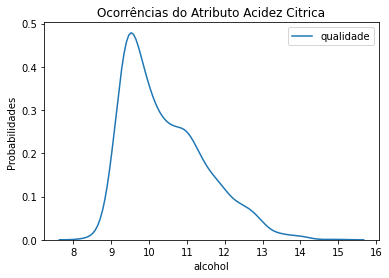

In [ ]:
#Verificado o atributo Álcool
sns.distplot(dados.alcohol, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Acidez Citrica')
plt.show()

**Boxpot**

verificando os pontos fora da curva, a mediana, e os quartis do atributo ácidez citrica

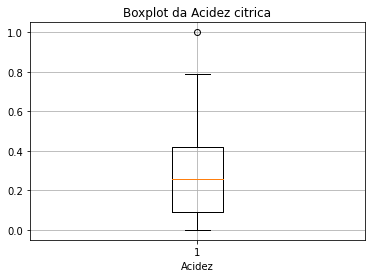

In [ ]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot(dados.citric_acid)
plt.title('Boxplot da Acidez citrica')
plt.xlabel('Acidez')
plt.grid()
plt.show()

Vamos separar as classes para poder fazer uma com comparação entre elas.

In [ ]:
#Visualizando a quantidade de vinhos pelas pontuações de qualidade
qualidade_0 = dados[dados['quality']==0].drop(columns=['quality']).reset_index(drop=True)
qualidade_1 = dados[dados['quality']==1].drop(columns=['quality']).reset_index(drop=True)
qualidade_2 = dados[dados['quality']==2].drop(columns=['quality']).reset_index(drop=True)
qualidade_3 = dados[dados['quality']==3].drop(columns=['quality']).reset_index(drop=True)
qualidade_4 = dados[dados['quality']==4].drop(columns=['quality']).reset_index(drop=True)
qualidade_5 = dados[dados['quality']==5].drop(columns=['quality']).reset_index(drop=True)
qualidade_6 = dados[dados['quality']==6].drop(columns=['quality']).reset_index(drop=True)
qualidade_7 = dados[dados['quality']==7].drop(columns=['quality']).reset_index(drop=True)
qualidade_8 = dados[dados['quality']==8].drop(columns=['quality']).reset_index(drop=True)
qualidade_9 = dados[dados['quality']==9].drop(columns=['quality']).reset_index(drop=True)
qualidade_10 = dados[dados['quality']==10].drop(columns=['quality']).reset_index(drop=True)

* Vamos fazer um boxplot das pontuações, da ácidez citrica e também do alcool para ter uma comparação visual desses dados

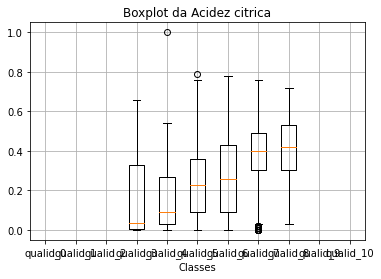

In [ ]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot([qualidade_0.citric_acid,qualidade_1.citric_acid,qualidade_2.citric_acid,qualidade_3.citric_acid,
             qualidade_4.citric_acid,qualidade_5.citric_acid,qualidade_6.citric_acid,qualidade_7.citric_acid,
             qualidade_8.citric_acid,qualidade_9.citric_acid,qualidade_10.citric_acid],labels=['qualid_0',
             'qualid_1','qualid_2','qualid_3','qualid_4','qualid_5','qualid_6','qualid_7','qualid_8',
             'qualid_9','qualid_10'])
plt.title('Boxplot da Acidez citrica')
plt.xlabel('Classes')
plt.grid()
plt.show()

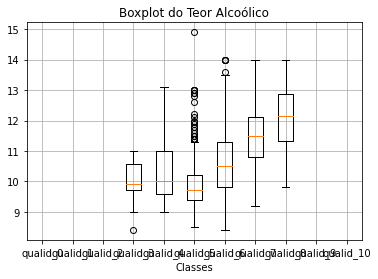

In [ ]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot([qualidade_0.alcohol,qualidade_1.alcohol,qualidade_2.alcohol,qualidade_3.alcohol,
             qualidade_4.alcohol,qualidade_5.alcohol,qualidade_6.alcohol,qualidade_7.alcohol,
             qualidade_8.alcohol,qualidade_9.alcohol,qualidade_10.alcohol],labels=['qualid_0',
             'qualid_1','qualid_2','qualid_3','qualid_4','qualid_5','qualid_6','qualid_7','qualid_8',
             'qualid_9','qualid_10'])
plt.title('Boxplot do Teor Alcoólico')
plt.xlabel('Classes')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


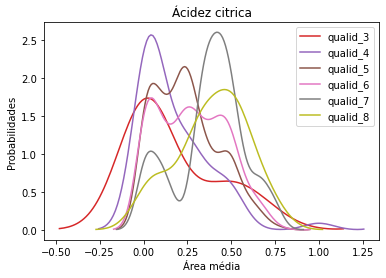

In [ ]:
# distribuição de probabilidade comparando a area média para as classes
sns.distplot(qualidade_0.citric_acid, hist=False, rug=False,label='qualid_0')
sns.distplot(qualidade_1.citric_acid, hist=False, rug=False,label='qualid_1')
sns.distplot(qualidade_2.citric_acid, hist=False, rug=False,label='qualid_2')
sns.distplot(qualidade_3.citric_acid, hist=False, rug=False,label='qualid_3')
sns.distplot(qualidade_4.citric_acid, hist=False, rug=False,label='qualid_4')
sns.distplot(qualidade_5.citric_acid, hist=False, rug=False,label='qualid_5')
sns.distplot(qualidade_6.citric_acid, hist=False, rug=False,label='qualid_6')
sns.distplot(qualidade_7.citric_acid, hist=False, rug=False,label='qualid_7')
sns.distplot(qualidade_8.citric_acid, hist=False, rug=False,label='qualid_8')
sns.distplot(qualidade_9.citric_acid, hist=False, rug=False,label='qualid_9')
sns.distplot(qualidade_10.citric_acid, hist=False, rug=False,label='qualid_10')
plt.xlabel('Área média')
plt.ylabel('Probabilidades')
plt.title('Ácidez citrica')
plt.show()

# Análise estatística dos dados

* Visualizando as médias de cada pontuação das qualidades dos vinhos

In [ ]:
qualidade_3.mean()

fixed_acidity            8.360000
volatile_acidity         0.884500
citric_acid              0.171000
residual_sugar           2.635000
chlorides                0.122500
free_sulfur_dioxide     11.000000
total_sulfur_dioxide    24.900000
density                  0.997464
pH                       3.398000
sulphates                0.570000
alcohol                  9.955000
dtype: float64

In [ ]:
qualidade_4.mean()

fixed_acidity            7.779245
volatile_acidity         0.693962
citric_acid              0.174151
residual_sugar           2.694340
chlorides                0.090679
free_sulfur_dioxide     12.264151
total_sulfur_dioxide    36.245283
density                  0.996542
pH                       3.381509
sulphates                0.596415
alcohol                 10.265094
dtype: float64

In [ ]:
qualidade_5.mean()

fixed_acidity            8.167254
volatile_acidity         0.577041
citric_acid              0.243686
residual_sugar           2.528855
chlorides                0.092736
free_sulfur_dioxide     16.983847
total_sulfur_dioxide    56.513950
density                  0.997104
pH                       3.304949
sulphates                0.620969
alcohol                  9.899706
dtype: float64

In [ ]:
qualidade_6.mean()

fixed_acidity            8.347179
volatile_acidity         0.497484
citric_acid              0.273824
residual_sugar           2.477194
chlorides                0.084956
free_sulfur_dioxide     15.711599
total_sulfur_dioxide    40.869906
density                  0.996615
pH                       3.318072
sulphates                0.675329
alcohol                 10.629519
dtype: float64

In [ ]:
qualidade_7.mean()

fixed_acidity            8.872362
volatile_acidity         0.403920
citric_acid              0.375176
residual_sugar           2.720603
chlorides                0.076588
free_sulfur_dioxide     14.045226
total_sulfur_dioxide    35.020101
density                  0.996104
pH                       3.290754
sulphates                0.741256
alcohol                 11.465913
dtype: float64

In [ ]:
qualidade_8.mean()

fixed_acidity            8.566667
volatile_acidity         0.423333
citric_acid              0.391111
residual_sugar           2.577778
chlorides                0.068444
free_sulfur_dioxide     13.277778
total_sulfur_dioxide    33.444444
density                  0.995212
pH                       3.267222
sulphates                0.767778
alcohol                 12.094444
dtype: float64

* **Vamos verificar a correlação existente entre nossos atributos.**

* **A correlação serve para medir a relação entre variaveis, em nosso caso, nós ajudará a verificar quais atributos possuem maior relação entre si.**

In [ ]:
#verificando a correlação dos dados
corr = dados.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


* O heat map auxilia visualmente na identificação das relações existentes entre os atributos.

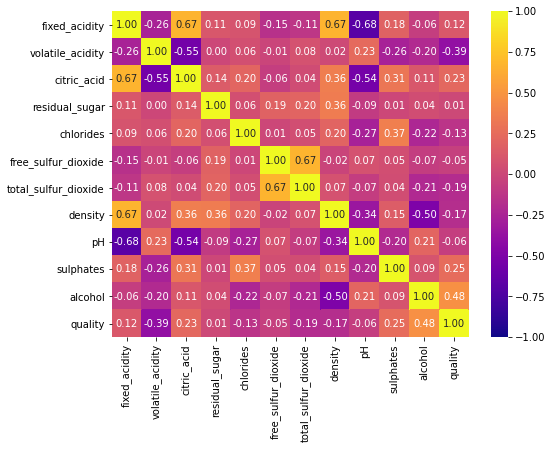

In [ ]:
#Não possui muita correlação 
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap=plt.cm.plasma)
#sns.diverging_palette(20, 220, n=200)


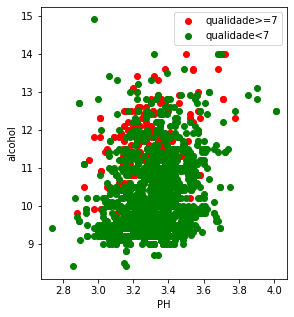

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x=dados.pH[dados.quality>=7],y=dados.alcohol[dados.quality>=7],c='red')
plt.scatter(x=dados.pH[dados.quality<7],y=dados.alcohol[dados.quality<7],c='green')
plt.xlabel('PH')
plt.ylabel('alcohol')
plt.legend(['qualidade>=7','qualidade<7'])

# **Faremos uma binarização do nosso target alterando os valores da qualidade do vinho para bom(1) e ruim(0)**

* Fazendo classificação binária para a variável de resposta.
* Nesse caso vamos dividir em dois intervalos, de 2 - 6.5 e de 6.5 - 8 (bins)

In [ ]:
#Dividindo o vinho em ruim(0) e bom(1) , dando o limite para a qualidade.
bins = (2, 6.5, 8)
bom_e_ruim = [0, 1]
dados['quality'] = pd.cut(dados['quality'], bins = bins, labels = bom_e_ruim)

In [ ]:
dados.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
#Agora vamos atribuir rótulos à nossa variável de qualidade
#label_quality = LabelEncoder()
#dados['quality'] = label_quality.fit_transform(dados['quality'])
#dados['quality'].value_counts()
#sns.countplot(dados['quality'])

#5 Classificação
* **Agora podemos dividir nossos dados em partes, uma para treino e outra para teste.**
* A ideia aqui é dividir os dados uma parte como os atributos descritores e outra com os atributos de classe. 

* **Atribui todas as colunas, exceto a quality:**


In [ ]:
#Dividindo meus dados em atibutos descritores e atributos de classe 
X = dados.iloc[:,:-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


 * **Fazendo a re-escala dos dados**

* Poderiamos utilizar outras formas de reescalar nossos dados, até mesmo uma função pronta para o minimo e o maximo. Algumas reescalas:
* **MinMaxScaler:** É feito sobre a coluna, e seu resultado fica com valores de 0s e 1s. 
 * Formula: valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

 * importe: from sklearn.preprocessing import MinMaxScaler
* **Normalze:** Age fazendo a reescala dos dados por linhas, diferente do MinMax que faz as reescalas por colunas. 

 * importe: from sklearn.preprocessing import Normalizer
* **StandardScaler:**Assim como o MinMax, também age sobre a coluna, a diferença está nos valores que utiliza para fazer a reescala.

  * formula: valor = (valor — média) / desvioPadão

  * importe: from sklearn.preprocessing import StandardScaler


In [ ]:
X = (X - X.min())/(X.max() - X.min())
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


* **Segunda parte dos dados:**

In [ ]:
#dividindo os dados
y = dados.quality
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: category
Categories (2, int64): [0 < 1]

* **Divdindo os dados em teste e treino:**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

#6 Definindo o algoritmo de aprendizado: Rede Neural Artificial



* **Os importes das bibliotecas estão sendo feitas todas em um unico lugar no top desse notebook (gosto das coisas organizadas)**

* Utilizando a Rede Neural Multi-Layer Perceptron (MLP):

In [ ]:
#Definindo o modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic', max_iter=1000)
type(classificador)

sklearn.neural_network._multilayer_perceptron.MLPClassifier

In [ ]:
#Treiando o modelo
classificador.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

* Usamos a função predict para obter as estimativas do nosso modelo:

In [ ]:
#Realizando a classificação 
classificacao = classificador.predict(X_test)
classificacao

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 7 Avaliação do classificador
* Agora vamos avaliar a taxa de acerto do nosso classificador

* Para avaliar o classificador iremos verificar: 

 * Accuracy: taxa de acerto do nosso classificador;
 * Recall: taxa de instâncias classificadas corretamente;
 * Precision: taxa de instâncias classificadas como positivas que realmente são positivas;
 * F1_score: balanço entre a precisão e o recall.
 

In [ ]:
#Verificando a acurária
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.890625

In [ ]:
#Verificando o Recall 
recall = recall_score(y_test,classificacao, average='weighted')
recall

0.890625

In [ ]:
#Verificando a precisão 
precisao = precision_score(y_test,classificacao,average='weighted')
precisao

0.8753522544283413

In [ ]:
#Verificando o F1
f1 = f1_score(y_test,classificacao, average='weighted')
round(f1,3)

0.881

# **Curva ROC**
* A curva ROC é uma representação gráfica do desempenho de um classificador binário.
* A curva representa a razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR), que são os valores que foram preditos. 
  * Quanto maior tpr, melhor 
  * Quanto menor fpr, melhor

**É necessário importar o roc_curve da biblioteca Sklearn.metrics. Também utilizaremos, novamente, a metaplotlib para mostrar o gráfico da curva. Os imports foram feitos no inicio desse notebook.**

In [ ]:
#Calculando a curva ROC
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [ ]:
#Verificando o valor dos falsos positivos (FPR)
fpr

array([0.        , 0.04195804, 1.        ])

In [ ]:
#Verificando o valor dos positivos verdadeiros(TPR)
tpr

array([0.        , 0.32352941, 1.        ])

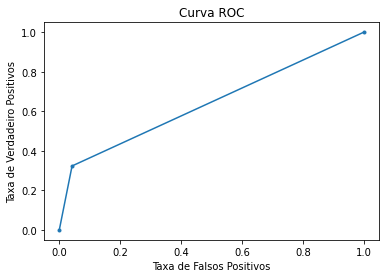

In [ ]:
#Plotando a curva ROC
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

# **Área sobe a Curva AUC**

* Área sob a curva ROC
* Interpretação numérica da curva ROC

In [ ]:
#pegando as estimativas de probabilidade do meu modelo de arvore para passar no AUC área sob a curva
#y_predic_prob = classificador.predict_proba(X_test)
#y_predic_prob

In [ ]:
#valor da área sob a curva 
roc_auc_score(y_test, classificacao)

0.6407856849033319

# **Validação Cruzada**
* Validação cruzada k-fold:
 * A ideia, aqui, é dividir o conjunto de dados em $k$ subconjuntos (folds) disjuntos;
 * Um subconjunto é usado para teste e os outros k-1, subconjuntos, são usados para criar o modelo;
 * Esse procedimento é repetido k vezes, alternando o subconjunto de teste;
 * Calcula-se a acurácia média das k repetições e tem-se a avaliação do método.

**É necessário importar o cross_val_score da biblioteca Sklearn.model_selection. Também utilizaremos, novamente, o MLPClassifier da sklearn.neural_network. Os imports foram feitos no inicio desse notebook.**

* Montando os folds para a validação cruzada:
 * Vamos novamente criar um classificador chamando a MPLClassifier();
 * Em seguida, utilizamos a cross_val_scores. Essa função divide os dados em treino e teste, faz o treinamento, divide em vários folds e retorna a acurácia obtida em cada folds.

In [ ]:
#Definindo nosso classificador
crossclassificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic', max_iter=1000)

* Abaixo vemos os valores numéricos da acurácia obtida em cada um dos folds:

In [ ]:
#Utilizando a cross validation e visualiazando os valores obtidos em cada folds
scores = cross_val_score(crossclassificador, X,y,cv = 10)
scores

array([0.8625    , 0.88125   , 0.85      , 0.89375   , 0.88125   ,
       0.91875   , 0.80625   , 0.875     , 0.8875    , 0.88679245])

* No geral, na prática, os valores que são mais considerados, são a média e o desvio padrão das taxas de acertos, então, abaixo vemos os valores de média e desvio padrão.

In [ ]:
round(scores.mean(),3),round(scores.std(),3)

(0.874, 0.029)

# 8 Comparação entre a MLP, a Árvore de Decisão e a Random Forest
* **É necessário importar o Árvore de Decisão e a Random Florest da biblioteca Sklearn.tree, Sklearn.ensemble, respectivamente. Também utilizaremos, novamente, o MLPClassifier da sklearn.neural_network e a cross_val_score de sklearn.metrics. Os imports foram feitos no inicio desse notebook.**


In [ ]:
#criando meu novo modelo de arvore 
arvore = DecisionTreeClassifier()

#Calculando os scores
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [ ]:
#Criando minha random florest 
floresta = RandomForestClassifier()

#Calculando os scores
scores_floresta = cross_val_score(arvore,X,y,cv=10)

In [ ]:

#Criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#Calculando os scores
scores_mlp = cross_val_score(mlp,X,y,cv=10)

In [ ]:
print('Árvore de Decisão: ',"\n"' Média:', round(scores_arvore.mean(),3),"\n",'Desvio padrão:',round(scores_arvore.std(),3))
print('Random Forest: ',"\n"' Média:', round(scores.mean(),3),"\n",'Desvio padrão:', round(scores.std(),3))
print('MLP:',"\n"' Média:', round(scores_mlp.mean(),3),"\n",'Desvio padrão:',round(scores_mlp.std(),3))

Árvore de Decisão:  
 Média: 0.841 
 Desvio padrão 0.036
Random Forest:  
 Média: 0.874 
 Desvio padrão 0.029
MLP: 
 Média: 0.876 
 Desvio padrão 0.025


# 9 Otimização de Parâmetros

* **É necessário importar o RandomizedSearchCV da biblioteca Sklearn.model_selection. O import foi feitos no inicio desse notebook.**

In [ ]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [ ]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [ ]:
print(mlp.best_params_)

{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': 50, 'activation': 'identity'}


In [ ]:
print(round(mlp.best_score_,3))

0.874


* **É necessário importar o GridSearchCV da biblioteca Sklearn.model_selection. O import foi feitos no inicio desse notebook.**

In [ ]:
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(mlp.best_params_)

In [ ]:
print(mlp.best_score_)

In [ ]:
mlp.cv_results_